In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import requests
import json
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.ensemble import RandomForestClassifier
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
df=pd.read_csv("training_backup.csv")
df_new=pd.read_csv("testing_backup.csv")

### Tokenization of words in lyrics

###Converting into lowercase letters and splitting each word and storing it as a dataframe

In [ ]:
df_new['lyrics'] = [entry.lower() for entry in df_new['lyrics']]
df_new['lyrics']= [word_tokenize(entry) for entry in df_new['lyrics']]

In [ ]:
df['lyrics'] = [entry.lower() for entry in df['lyrics']]
df['lyrics']= [word_tokenize(entry) for entry in df['lyrics']]

### lyrics column in the df_new DataFrame will have been lemmatized, and the lemmatized words are stored in the text_final column

For each sentence Noun adjective adverb adverb is added with mapping
Adding root words like acting -> act

In [ ]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df_new['lyrics']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    df_new.loc[index,'text_final'] = str(Final_words)

In [ ]:
df.tail()

,lyrics,mood
1477,"[yeah-yeah, yeah-yeah, yeah-yeah, yeah-yeah, y...",1
1478,"[rip, them, down, hold, me, up, tell, them, th...",3
1479,"[it, 's, way, too, late, to, think, of, someon...",4
1480,"[got, no, place, to, go, but, there, 's, a, gi...",2
1481,"[every, light, in, the, night, flicker, in, an...",1


In [ ]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(df['lyrics']):
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(entry):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    df.loc[index,'text_final'] = str(Final_words)

In [ ]:
train_x = df['text_final']
valid_x = df_new['text_final'][:233]
train_y = df['mood']
valid_y = df_new['mood'][:233]

#### CountVectorizer
#### TfidfVectorizer
#### Tfidf-NGram Model

train_y and valid_y will contain the encoded numerical labels, and the all_texts list will contain all the text data from both the training and validation datasets

In [ ]:
Encoder = LabelEncoder()
train_y = Encoder.fit_transform(train_y.ravel())
valid_y = Encoder.fit_transform(valid_y.ravel())

In [ ]:
all_texts = []
for items in train_x:
    all_texts.append(items)
for items in valid_x:
    all_texts.append(items)
print(all_texts[0])

['god', 'need', 'friend', 'god', 'come', 'end', 'god', 'lose', 'mind', 'god', 'find', 'wan', 'na', 'wan', 'na', 'wan', 'na', 'wan', 'na', 'love', 'felt', 'like', 'hate', 'hate', 'felt', 'like', 'love', 'say', 'fear', 'say', 'scar', 'wan', 'na', 'wan', 'na', 'wan', 'na', 'wan', 'na', 'tell', 'believe', 'tell', 'see', 'cause', 'know', 'trust', 'heart', 'fill', 'disgust', 'ca', 'take', 'tell', 'believe', 'tell', 'see', 'cause', 'know', 'trust', 'heart', 'fill', 'disgust', 'tell', 'believe', 'tell', 'believe', 'lady', 'gentleman', 'may', 'attention', 'ready', 'joke', 'ready', 'great', 'deception', 'tell', 'believe', 'tell', 'believe', 'tell', 'believe', 'tell', 'believe', 'tell', 'believe', 'tell', 'believe']


In [ ]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas,numpy,xgboost, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

### CountVectorizer-Model
CountVectorizer is used to convert a collection of text documents  into a numerical feature matrix

Tokenization - make all the sentence into words
Counting the frequency of all words and its stored in a sparse matrix

In [ ]:
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(all_texts)
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)

### TfidfVectorizer Model

In [ ]:
import nltk
import string
import re

porter_stemmer = nltk.stem.porter.PorterStemmer()#Stemming

#This function takes a text input, converts it to lowercase,
#tokenizes it into words, applies stemming using the Porter stemmer, and removes any non-alphabetic characters.
#The result is a list of stemmed words as tokens.

def porter_tokenizer(text, stemmer=porter_stemmer):
    lower_txt = text.lower()
    tokens = nltk.wordpunct_tokenize(lower_txt)
    stems = [porter_stemmer.stem(t) for t in tokens]
    no_punct = [s for s in stems if re.match('^[a-zA-Z]+$', s) is not None]
    return no_punct

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(
            encoding='utf-8',
            decode_error='replace',
            strip_accents='unicode',
            analyzer='word',
            binary=False,
            stop_words="english",
            tokenizer=porter_tokenizer
    )#Matrix with tfid will returned with each word will analysed each will be a feature

### Tfidf-NGram Model
In additon to tfid here sequence of n words will be considerd for analysis

TF-IDF captures individual word importance, while TF-IDF N-gram considers the importance of word pairs, which can be useful for tasks that require capturing multi-word expressions

In [ ]:
tfidf_vect.fit(all_texts)
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(2,2), max_features=7000)
tfidf_vect_ngram.fit(all_texts)
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

For each model fit the model

In [ ]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    classifier.fit(feature_vector_train, label)
    predictions = classifier.predict(feature_vector_valid)
    return metrics.accuracy_score(predictions, valid_y)

### Multinomial Naive Bayes Model

In [ ]:
accuracy_count_nb = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print ("NB, Count Vectors: ", accuracy_count_nb)#Accuracy for count vectorization

accuracy_word_nb = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy_word_nb)#ACcuracy  for tfid vectorization

accuracy_ngram_nb = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy_ngram_nb) #ACcuracy  for tfid n gram vectorization

NB, Count Vectors:  0.5836909871244635
NB, WordLevel TF-IDF:  0.4592274678111588
NB, N-Gram Vectors:  0.5836909871244635


### Random Forest Classifier

In [ ]:
accuracy_count_rf = train_model(RandomForestClassifier(n_estimators=100),xtrain_count,train_y,xvalid_count)
print("RF, Count Vectors: ",accuracy_count_rf)

accuracy_word_rf = train_model(RandomForestClassifier(n_estimators=100),xtrain_tfidf,train_y,xvalid_tfidf)
print("RF, WordLevel TF-IDF Vectors: ",accuracy_word_rf)

accuracy_ngram_rf = train_model(RandomForestClassifier(n_estimators=100),xtrain_tfidf_ngram,train_y,xvalid_tfidf_ngram)
print("RF, N-Gram Vectors: ",accuracy_ngram_rf)

RF, Count Vectors:  0.6523605150214592
RF, WordLevel TF-IDF Vectors:  0.6351931330472103
RF, N-Gram Vectors:  0.6266094420600858


### Logistic Regression Model

In [ ]:
accuracy_count_lc = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print ("LR, Count Vectors: ", accuracy_count_lc)

accuracy_word_lc = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("LR, WordLevel TF-IDF: ", accuracy_word_lc)

accuracy_ngram_lc = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("LR, N-Gram Vectors: ", accuracy_ngram_lc)

LR, Count Vectors:  0.6394849785407726
LR, WordLevel TF-IDF:  0.6223175965665236
LR, N-Gram Vectors:  0.5836909871244635


### XGBoost Classifier

In [ ]:
accuracy_count_bo = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc())
print ("Xgb, Count Vectors: ", accuracy_count_bo)

accuracy_word_bo = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
print ("Xgb, WordLevel TF-IDF: ", accuracy_word_bo)

accuracy_ngram_bo = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram.tocsc(), train_y, xvalid_tfidf_ngram.tocsc())
print ("Xgb, Ngram Level Vectors: ", accuracy_ngram_bo)

Xgb, Count Vectors:  0.6866952789699571
Xgb, WordLevel TF-IDF:  0.630901287553648
Xgb, Ngram Level Vectors:  0.5665236051502146


###  - Random Forest

In [ ]:
accuracy_count_bg = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print ("RF, Count Vectors: ", accuracy_count_bg)

accuracy_word_bg = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("RF, WordLevel TF-IDF: ", accuracy_word_bg)

accuracy_ngram_bg = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("RF, Ngram Vectors: ", accuracy_ngram_bg)

RF, Count Vectors:  0.6523605150214592
RF, WordLevel TF-IDF:  0.648068669527897
RF, Ngram Vectors:  0.6223175965665236


In [ ]:
from sklearn.svm import LinearSVC
accuracy_count_svm = train_model(LinearSVC(multi_class="ovr"), xtrain_count, train_y, xvalid_count)
print ("SVM, Count Vectors: ", accuracy_count_svm)

accuracy_word_svm = train_model(LinearSVC(multi_class="ovr"), xtrain_tfidf, train_y, xvalid_tfidf)
print ("SVM, WordLevel TF-IDF: ", accuracy_word_svm)

accuracy_ngram_svm = train_model(LinearSVC(multi_class="ovr"), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print ("SVM, Ngram Vectors: ", accuracy_ngram_svm)

SVM, Count Vectors:  0.6266094420600858
SVM, WordLevel TF-IDF:  0.6523605150214592
SVM, Ngram Vectors:  0.6051502145922747


In [ ]:

import matplotlib as mpl
import numpy as np

def plot_cm(X, y, clf, title):

    cm = metrics.confusion_matrix(y, clf.predict(X))
    print(metrics.classification_report(y, clf.predict(X)))
    np.set_printoptions(suppress=True)
    mpl.rc("figure", figsize=(10,10))

    hm = sns.heatmap(cm,
            cbar=False,
            annot=True,
            square=True,
            fmt='d',
            yticklabels=['happy','sad','angry','neutral'],
            xticklabels=['happy','sad','angry','neutral'],
            cmap='Blues'
            )
    plt.title(title)
    plt.ylabel('actual class')
    plt.xlabel('predicted class')
    plt.tight_layout()
    #plt.savefig("rf_tfidf.jpg")
    plt.show()


              precision    recall  f1-score   support

           0       0.78      0.65      0.71        97
           1       0.54      0.90      0.68        68
           2       1.00      0.33      0.50        12
           3       0.69      0.45      0.54        56

    accuracy                           0.66       233
   macro avg       0.75      0.58      0.61       233
weighted avg       0.70      0.66      0.65       233



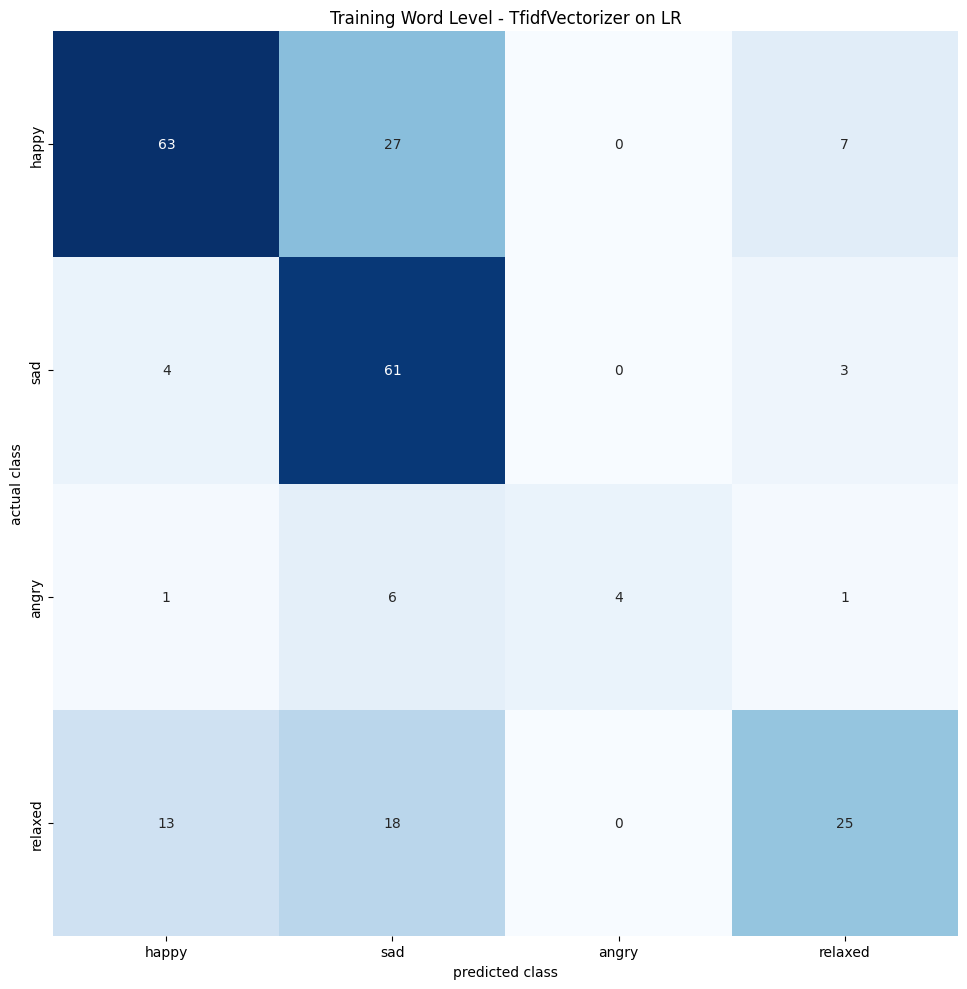

In [ ]:
# import seaborn as sns
import matplotlib.pyplot as plt

claf=ensemble.RandomForestClassifier()#create a random forest
claf.fit(xtrain_tfidf,train_y)
plot_cm(xvalid_tfidf, valid_y, claf, 'Training Word Level - TfidfVectorizer')

              precision    recall  f1-score   support

           0       0.79      0.66      0.72        97
           1       0.59      0.68      0.63        68
           2       0.44      0.33      0.38        12
           3       0.54      0.62      0.58        56

    accuracy                           0.64       233
   macro avg       0.59      0.57      0.58       233
weighted avg       0.65      0.64      0.64       233



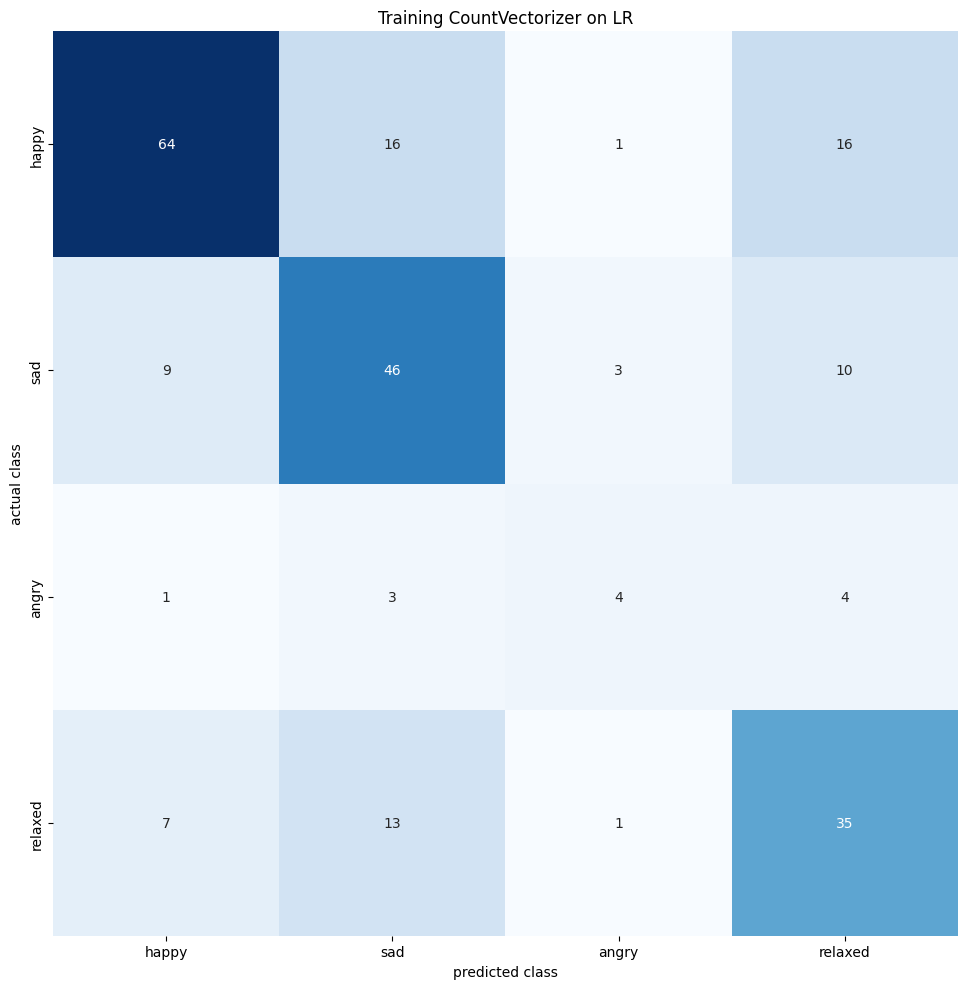

In [ ]:
# import seaborn as sns
import matplotlib.pyplot as plt

claf=linear_model.LogisticRegression()
claf.fit(xtrain_count,train_y)
plot_cm(xvalid_count, valid_y, claf, 'Training CountVectorizer')

              precision    recall  f1-score   support

           0       0.85      0.54      0.66        97
           1       0.51      0.81      0.63        68
           2       0.80      0.33      0.47        12
           3       0.57      0.61      0.59        56

    accuracy                           0.62       233
   macro avg       0.68      0.57      0.59       233
weighted avg       0.68      0.62      0.62       233



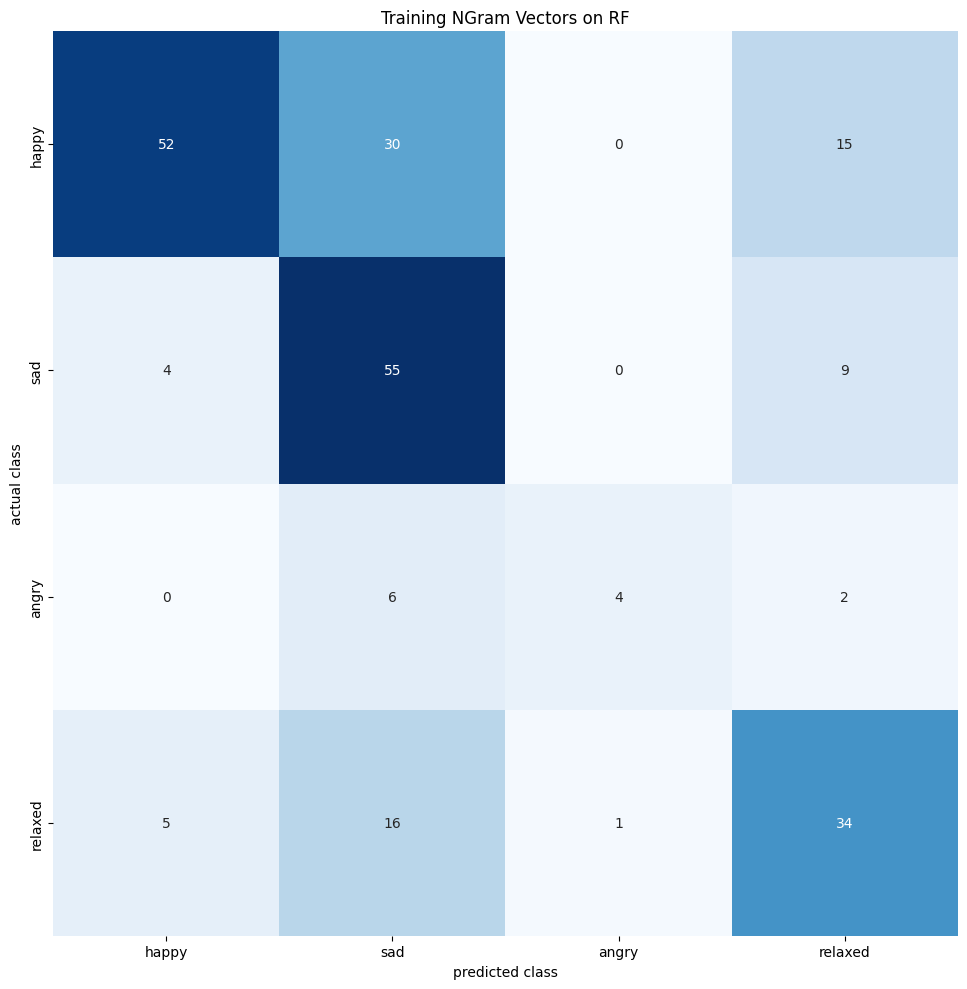

In [ ]:
# import seaborn as sns
import matplotlib.pyplot as plt

claf=ensemble.RandomForestClassifier()
claf.fit(xtrain_tfidf_ngram,train_y)
plot_cm(xvalid_tfidf_ngram, valid_y, claf, 'Training NGram Vectors ')

              precision    recall  f1-score   support

           0       0.76      0.69      0.72        97
           1       0.64      0.69      0.67        68
           2       0.80      0.33      0.47        12
           3       0.51      0.61      0.55        56

    accuracy                           0.65       233
   macro avg       0.68      0.58      0.60       233
weighted avg       0.67      0.65      0.65       233



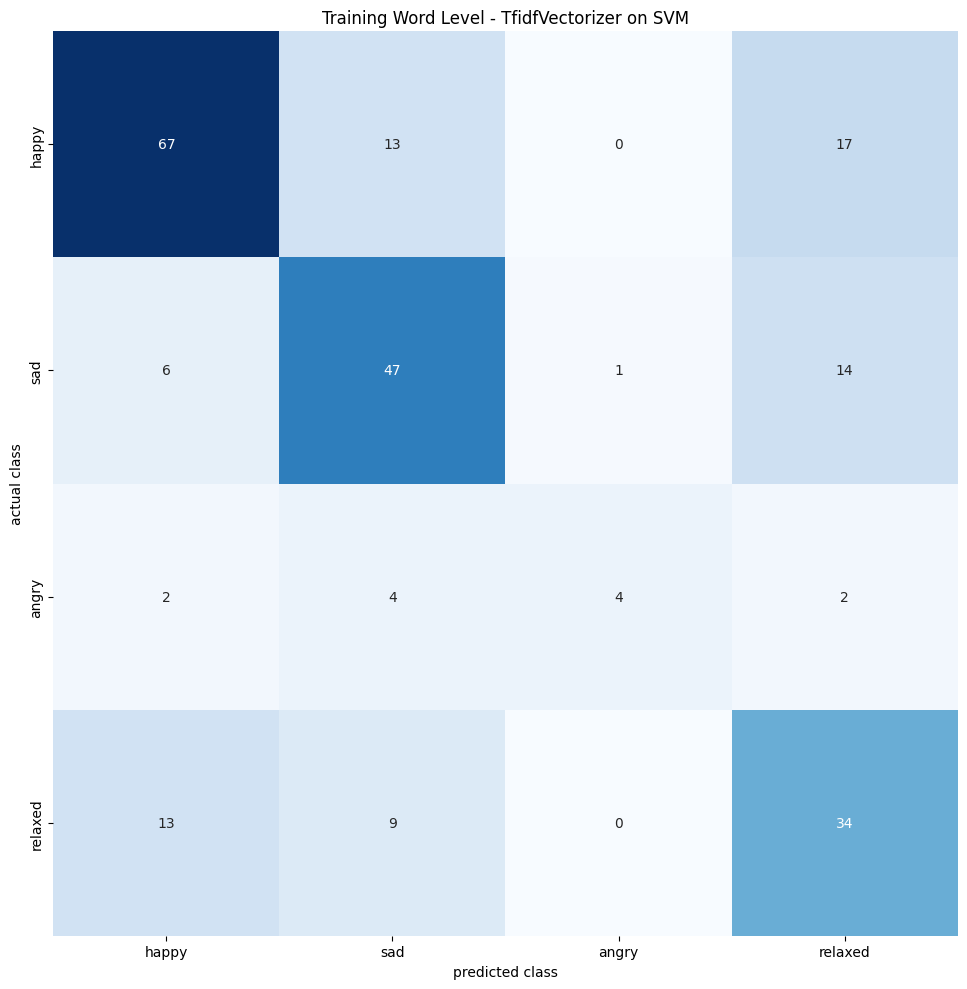

In [ ]:
# import seaborn as sns
import matplotlib.pyplot as plt

claf=svm.LinearSVC(multi_class="ovr")
claf.fit(xtrain_tfidf,train_y)
plot_cm(xvalid_tfidf, valid_y, claf, 'Training Word Level - TfidfVectorizer on SVM')

In [ ]:
def pred(lyrics):
    wt=word_tokenize(lyrics)
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    Final_words = []
    word_Lemmatized = WordNetLemmatizer()
    for word, tag in pos_tag(wt):
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    result = str(Final_words)
    df9=pd.DataFrame(columns=["lyrics"])
    df9=df9.append({'lyrics':result},ignore_index=True)
#     xvalid_count =  count_vect.transform(result)
#     res = Encoder.fit_transform(result)
    testx=df9['lyrics']
#     print(testx.shape)
    xvalid_tfidf =  tfidf_vect.transform(testx)
    y=claf.predict(xvalid_tfidf)
    if y==0:
        return "Happy"
    elif(y==1):
        return "Sad"
    elif(y==2):
        return "Angry"
    elif(y==3):
        return "Neutral"



In [ ]:
!pip install googletrans
!pip install deep_translator

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15716 sha256=0c968ce83788fe5a64adde677bd081b67c0c74f997237e40e0a83893d4628897
  Stored in directory: /root/.cache/pip/wheels/b3/81/ea/8b030407f8ebfc2f857814e086bb22ca2d4fea1a7be63652ab
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling cha

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 736.1 kB/s eta 0:00:00


In [ ]:
ly = """The club isn't the best place to find a lover
So the bar is where I go
Me and my friends at the table doing shots
Drinking fast and then we talk slow
Come over and start up a conversation with just me
And trust me I'll give it a chance now
Take my hand, stop, put Van the Man on the jukebox
And then we start to dance, and now I'm singing like
Girl, you know I want your love
Your love was handmade for somebody like me
Come on now, follow my lead
I may be crazy, don't mind me
Say, boy, let's not talk too much
Grab on my waist and put that body on me
Come on now, follow my lead
Come, come on now, follow my lead
I'm in love with the shape of you
We push and pull like a magnet do
Although my heart is falling too
I'm in love with your body
Last night you were in my room
And now my bedsheets smell like you
Every day discovering something brand new
I'm in love with your body
(Oh-I-oh-I-oh-I-oh-I)
I'm in love with your body
(Oh-I-oh-I-oh-I-oh-I)
I'm in love with your body
(Oh-I-oh-I-oh-I-oh-I)
I'm in love with your body
Every day discovering something brand new
I'm in love with the shape of you
One week in we let the story begin
We're going out on our first date
You and me are thrifty, so go all you can eat
Fill up your bag and I fill up a plate
We talk for hours and hours about the sweet and the sour
And how your family is doing okay
And leave and get in a taxi, then kiss in the backseat
Tell the driver make the radio play, and I'm singing like
Girl, you know I want your love
Your love was handmade for somebody like me
Come on now, follow my lead
I may be crazy, don't mind me
Say, boy, let's not talk too much
Grab on my waist and put that body on me
Come on now, follow my lead
Come, come on now, follow my lead
I'm in love with the shape of you
We push and pull like a magnet do
Although my heart is falling too
I'm in love with your body
Last night you were in my room
And now my bedsheets smell like you
Every day discovering something brand new
I'm in love with your body
(Oh-I-oh-I-oh-I-oh-I)
I'm in love with your body
(Oh-I-oh-I-oh-I-oh-I)
I'm in love with your body
(Oh-I-oh-I-oh-I-oh-I)
I'm in love with your body
Every day discovering something brand new
I'm in love with the shape of you
Come on, be my baby, come on
Come on, be my baby, come on
Come on, be my baby, come on
Come on, be my baby, come on
Come on, be my baby, come on
Come on, be my baby, come on
Come on, be my baby, come on
Come on, be my baby, come on
I'm in love with the shape of you
We push and pull like a magnet do
Although my heart is falling too
I'm in love with your body
Last night you were in my room
And now my bedsheets smell like you
Every day discovering something brand new
I'm in love with your body
Come on, be my baby, come on
Come on (I'm in love with your body), be my baby, come on
Come on, be my baby, come on
Come on (I'm in love with your body), be my baby, come on
Come on, be my baby, come on
Come on (I'm in love with your body), be my baby, come on
Every day discovering something brand new
I'm in love with the shape of you"""
pred(lyrics = ly)

Tag: 

'Sad'

In [ ]:
from deep_translator import GoogleTranslator

# Define the text in Tamil script
tamil_text = """
ஆத்தா ஆத்தா கண்ணால பாத்தா
ஹீட்டா ஹீட்டா லுக்க விட்டா
பீட்டா பீட்டா வந்தாளே ட்ரீட்டா
ஸ்லிப் ஆன லிப்பால கொக்கா மக்கா

ஹே ஜிமிக்கி ஜிமிக்கி ஜிமிக்கி பொண்ணு
மினுக்கி மினுக்கி மினுக்கி கண்ணு
வருதே அலையாட்டம்
வாக்கிங் வரும் சாக்லேட் செலையாட்டம்

ஹே டஸ்கி டஸ்கி டஸ்கி ரோஸூ
ஹஸ்கி ஹஸ்கி ஹஸ்கி வாய்சு
தூறல் அழகாட்டம்
ஊருக்குள்ள ஏஞ்சல் நடமாட்டம்

என்ன கட்டி இழுத்தவன் நீ தானே
நானும் இப்போ உனக்கொரு ஃபேன் தானே
மெல்ல வந்து ஒரசுற ஷாக்குல
உயிருல தாக்குற கலவர கோள் நீயே

எக்க சக்க அழகனும் நீ தானே
கொஞ்சம் கொஞ்சம் பழகணும் நான் தானே
உன் அழக வரையுற கையில
கரையுர மையுல அமுதத்த தெளிச்சானே

அன்றங்கே வந்ததும் இந்த நிலவா
இன்றிங்கே வந்ததும் அந்த நிலவா
இன்பம் பெறும் இருவர் கண்ணுக்கும்
வெண்ணிலவு ஒன்றே அல்லவா

ஹே நீ நீ மேக்கப் பண்ண
நிலாவில் கர ஒண்ணு உண்டாக்குதே

ஹே கண்ணாடி நீ தான்டி
உடையுறேன் நான் இங்க
உங்க வீட்டு நேம் போர்டில்
மாமனோட பேரெங்க

ஃப்ரெண்ட் சோனு வேரோட கட் ஆகுது
உன்னோட என் லைஃபு செட் ஆகுது
உன் ஹார்ட் என்னோட ஹட் ஆகுது
ஓடாதே ஒன்னாலே ஸ்லிப் ஆகுது

டின்னருக்கு உன் முத்தம் ஒரு கப்பு
டாக்டருக்கு உன்ன குடு என்ன தப்பு
ஹீட் பண்ணி குறு குறு பாக்குற
குறும்புல சாய்க்குற எகுறுது உன் ஹைப்பு

ஏ ஆத்தா ஆத்தா கண்ணால பாத்தா
ஹீட்டா ஹீட்டா லுக்க விட்டா
பீட்டா பீட்டா வந்தாளே ட்ரீட்டா
ஸ்லிப் ஆன லிப்பால கொக்கா மக்கா

அன்றங்கே வந்ததும் இந்த நிலவா
இன்றிங்கே வந்ததும் அந்த நிலவா
இன்பம் பெறும் இருவர் கண்ணுக்கும்
வெண்ணிலவு ஒன்றே அல்லவா


"""

# Translate Tamil to English
english_translation = GoogleTranslator(source='ta', target='en').translate(tamil_text)


#print(f"English Translation: {english_translation}")
pred(english_translation)


Tag: 

'Happy'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import shutil


In [ ]:
folder_path = "/content/drive/MyDrive/music"

toCreate = "/content/drive/MyDrive/music"



In [ ]:

file_path = '/content/drive/MyDrive/MusicLyrics.txt'

song_paths = []
song_lyrics = []
current_song_path = None
current_lyrics = ""

with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        if line.strip().endswith('.mp3'):
            if current_song_path:
                song_paths.append(current_song_path)
                song_lyrics.append(current_lyrics.strip())
                current_lyrics = ""
            current_song_path = line.strip()
        else:
            current_lyrics += line
    if current_song_path and current_lyrics:
        song_paths.append(current_song_path)
        song_lyrics.append(current_lyrics.strip())



In [ ]:
for i in range(len(song_paths)):
    try:
      english = GoogleTranslator(source='ta', target='en').translate(song_lyrics[i])
      emotion = pred(english)
      toCreate = folder_path + emotion
      if not os.path.exists(toCreate):
        os.mkdir(toCreate)

      destination_music_file = os.path.join(toCreate , os.path.basename(song_paths[i]))

      shutil.copy(song_paths[i] , destination_music_file)

    except:
      pass




Tag: Tag: Tag: Tag: Tag: Tag: Tag: Tag: Tag: Tag: Tag: Tag: Tag: Tag: Tag: Tag: Tag: Tag: Tag: Tag: Tag: Tag: Tag: 